
###Algerian Forest Fire Dataset




## DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.



* As per the Task given i choose regression problem to predict fire weather index

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# Create Dataframe and Read the dataset using Pandas
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
dataset.head()
df = pd.DataFrame(dataset)
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
[features for features in df.columns if df[features].isnull().sum()>1]

['Classes  ']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


The dataset is converted into two sets based on Region from 122th index,
we can make a new column based on the Region

 **1 : "Bejaia Region Dataset"**

 **2 : "Sidi-Bel Abbes Region Dataset"**

In [7]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [9]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [10]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [11]:
#remove 122th column
df= df.drop(122).reset_index(drop=True)

In [12]:
# List out column names to check
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [15]:
objects = [features for features in df.columns if df[features].dtype=='O']
for i in objects:
  if i!='Classes':
    df[i] = df[i].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [17]:
# Check Unique values of target variable
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [18]:
# Strip mispaced values
df.Classes = df.Classes.str.strip()

In [19]:
#Droping Year features
df1 = df.drop(['day','month','year'], axis=1)

In [20]:

# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

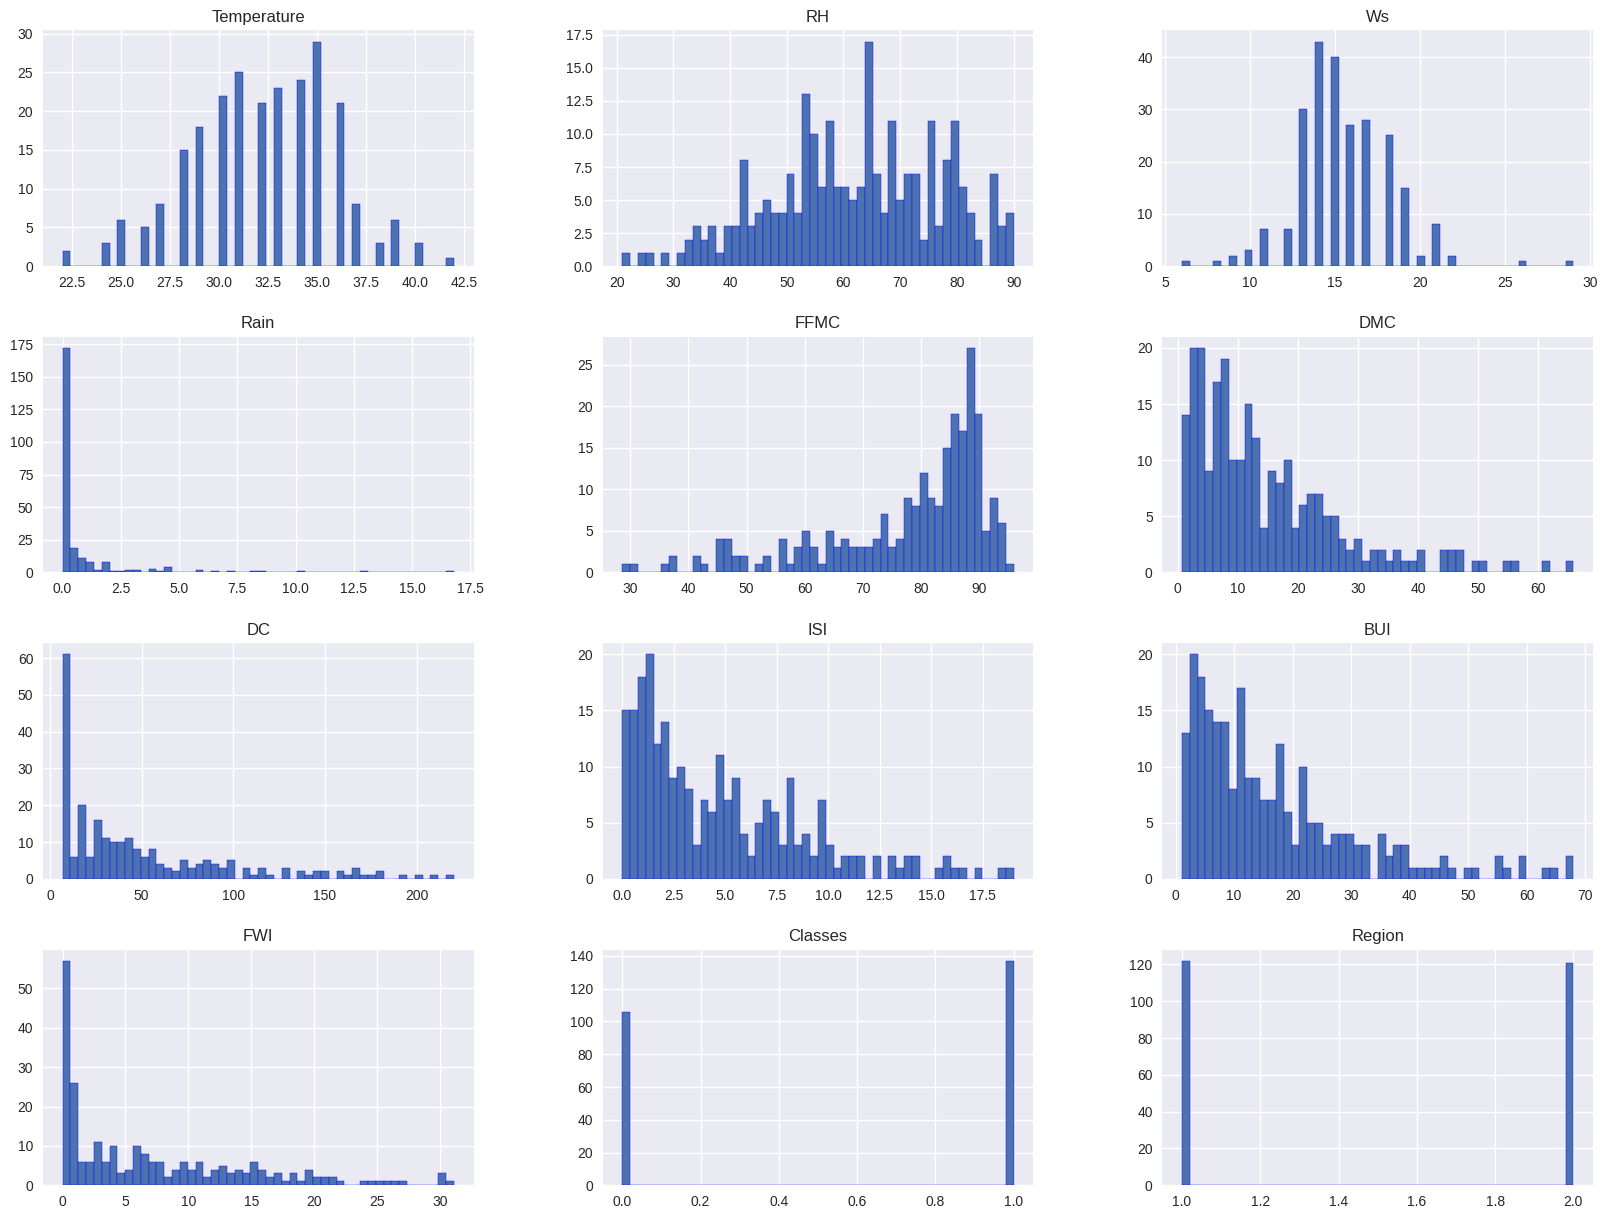

In [21]:
# PLot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

##Feature Selection

In [35]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [36]:
feature_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region','Classes']
target_column = 'FWI'

# Split into features (X) and target (y)
X = df1[feature_columns]
y = df1[target_column]

In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<Axes: >

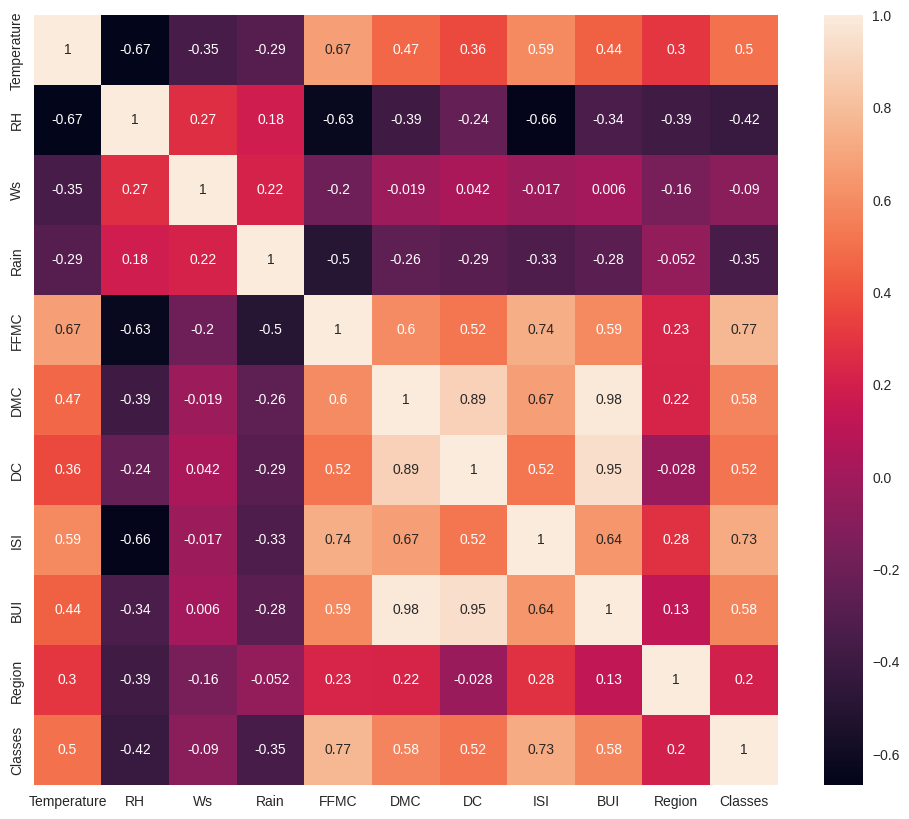

In [38]:
#Check for Multicollinearity
plt.figure (figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [39]:
def correlation (dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [40]:
correlation (X_train, 0.85)

{'BUI', 'DC'}

In [41]:
X_train.drop(correlation (X_train, 0.85), axis=1, inplace=True)
X_test.drop(correlation (X_test, 0.85), axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

##Feature Scaling or Standardization

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled

array([[-1.70191253,  1.31243992,  2.2889152 , ..., -1.07706476,
        -0.98974332, -1.14434427],
       [-0.02591745, -0.19536454, -0.51930329, ..., -0.69715465,
         1.01036297, -1.14434427],
       [ 0.81208009, -1.42902274, -0.16827598, ..., -0.06397112,
         1.01036297,  0.8738629 ],
       ...,
       [-0.02591745,  0.90122052,  1.58686058, ..., -0.82379135,
        -0.98974332, -1.14434427],
       [ 0.25341506,  0.21585486, -0.51930329, ...,  0.29061166,
        -0.98974332,  0.8738629 ],
       [ 0.53274758, -1.56609587,  0.88480595, ...,  2.46876299,
         1.01036297,  0.8738629 ]])


##Box plot to understand before scaling vs after


Text(0.5, 1.0, 'X_train After Scaling')

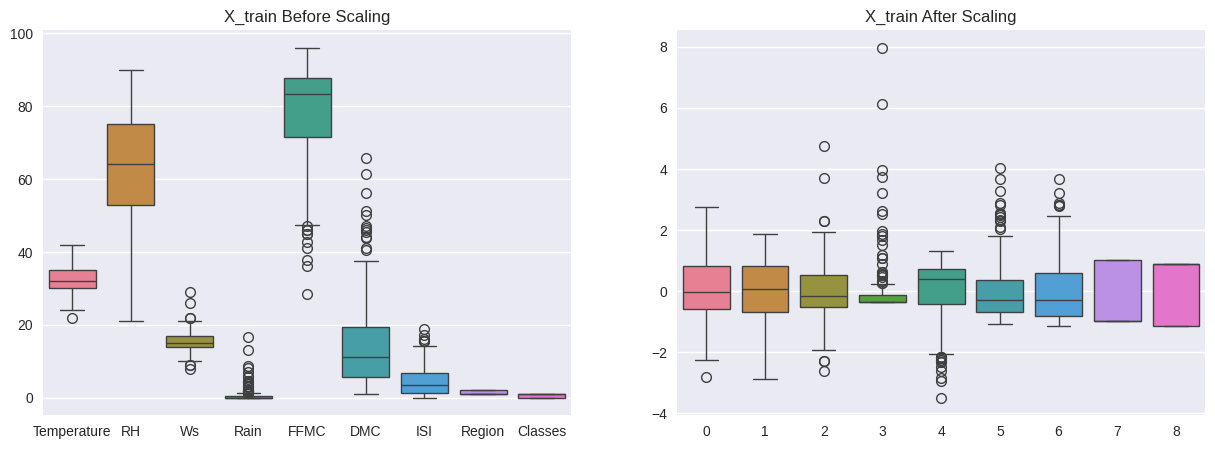

In [44]:
plt.subplots(figsize =(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

In [45]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.181378180145211
R-squared: 0.9827147507183254


In [46]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.607792592594827
R-squared: 0.9325814164000681


In [49]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.226230236723281
R-squared: 0.9820585011009062


In [47]:
#Elastic net Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9.302462174440167
R-squared: 0.8638916984239688


In [50]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))